Task1_0801. 붓꽃 데이터를 이용해 K-means 수행 시 최적의 군집 개수를 실루엣 계수의 시각화를 통하여 구하세요.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


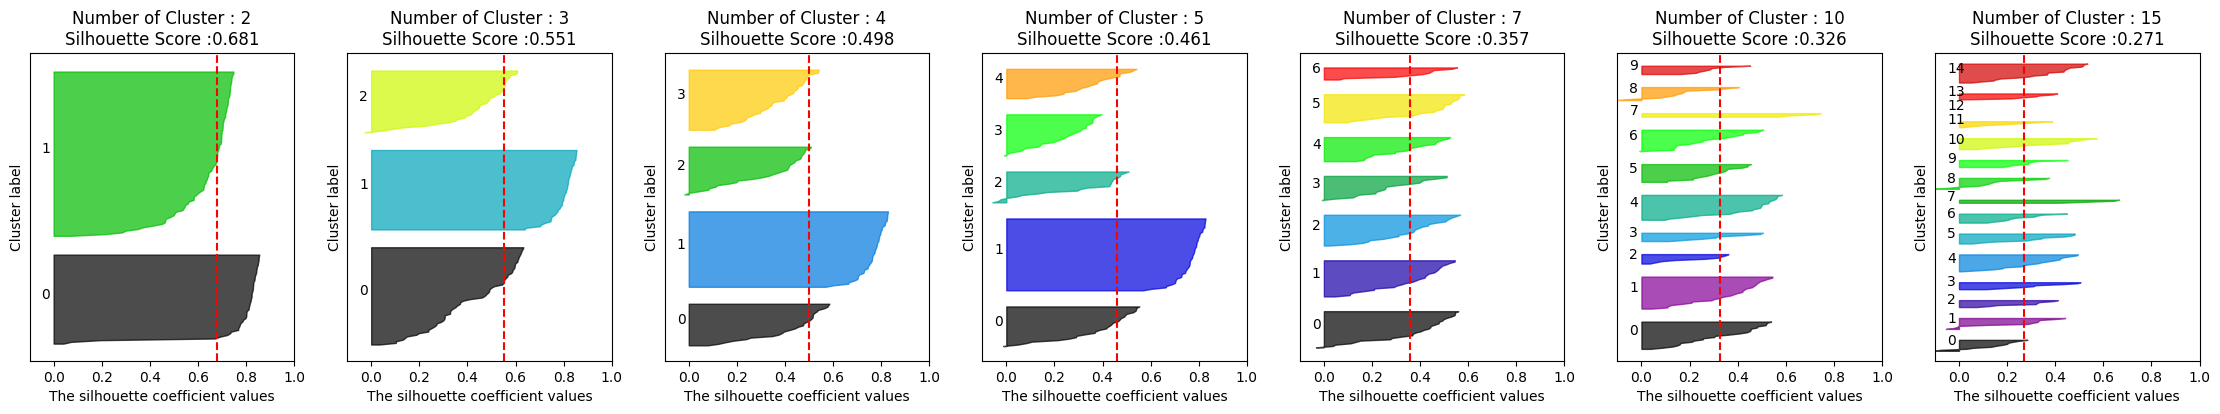

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris

# 붓꽃 데이터 로드
iris = load_iris()
Feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
df_iris = pd.DataFrame(data=iris.data, columns=Feature_names)
display(df_iris)
# 클러스터 개수를 2,3,4,5개일 때의 클러스터별 실루엣 계수 평균값을 시각화
## 4개의 군집일 때 가장 최적
visualize_silhouette([2,3,4,5,7,10, 15], df_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

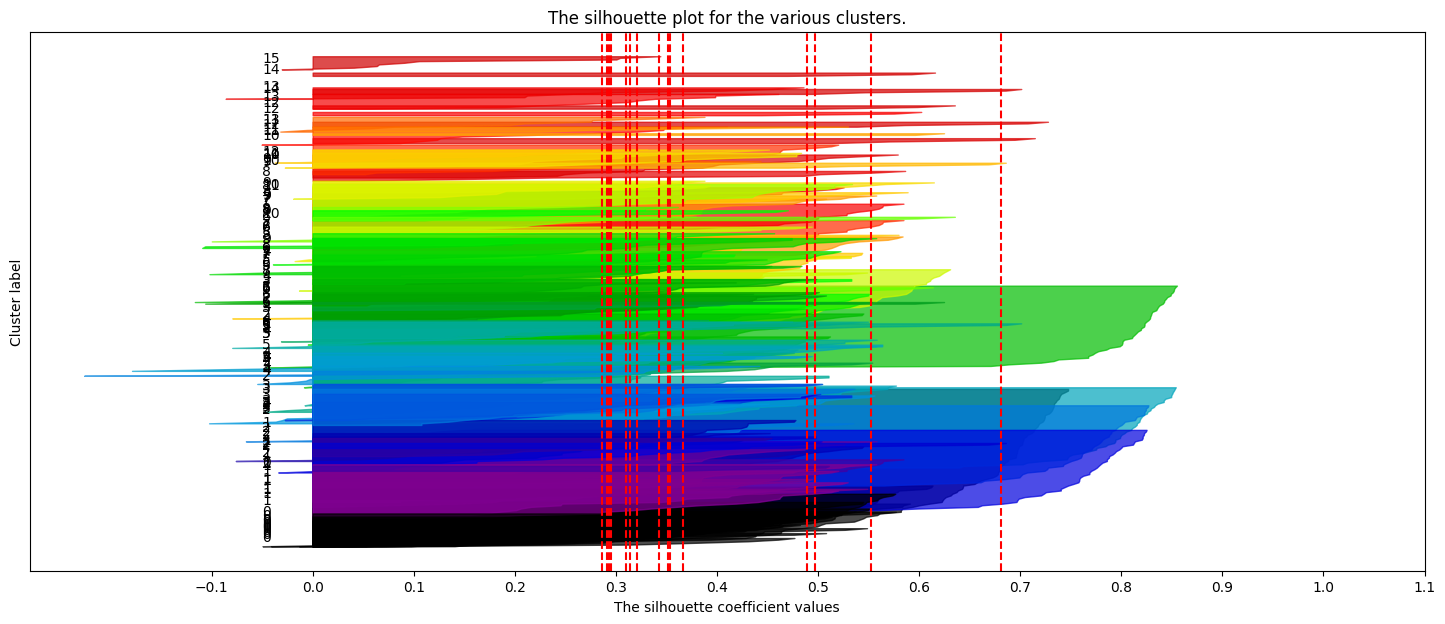

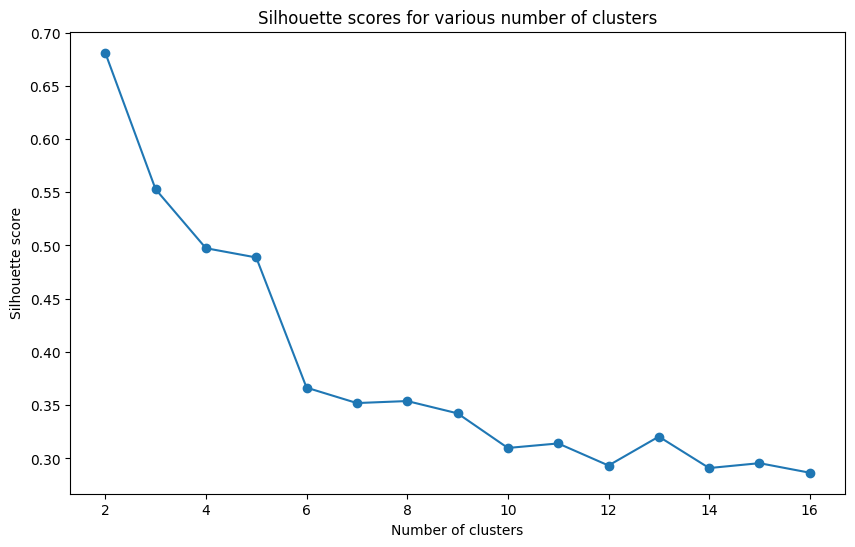

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris

# 붓꽃 데이터 로드
iris = load_iris()
iris_data = iris.data

# 군집 개수 후보 설정
range_n_clusters = list(range(2, 17))

# 시각화를 위한 subplot 설정
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # K-means 모델 초기화 및 학습
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(iris_data)

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(iris_data, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    # 각 샘플의 실루엣 계수 계산
    sample_silhouette_values = silhouette_samples(iris_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

plt.show()

# 실루엣 평균 점수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette scores for various number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()
